<h1><center>Stroke Analysis</center></h1>

#### References
### Stroke Dataset
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

#### In this project, machine learning is used to predict the outcome of whether a patient will have a stroke or not.

## Load the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
_
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
from platform import python_version
print(python_version())

3.8.12


In [3]:
import sklearn
sklearn.__version__

'1.0.1'

In [4]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_data .head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000,0,1,Yes,Private,Urban,228.690,36.600,formerly smoked,1
1,51676,Female,61.000,0,0,Yes,Self-employed,Rural,202.210,NaN,never smoked,1
2,31112,Male,80.000,0,1,Yes,Private,Rural,105.920,32.500,never smoked,1
3,60182,Female,49.000,0,0,Yes,Private,Urban,171.230,34.400,smokes,1
4,1665,Female,79.000,1,0,Yes,Self-employed,Rural,174.120,24.000,never smoked,1


In [5]:
stroke_data.shape

(5110, 12)

In [6]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
stroke_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.000,36517.829,21161.722,67.000,17741.250,36932.000,54682.000,72940.000
age,5110.000,43.227,22.613,0.080,25.000,45.000,61.000,82.000
hypertension,5110.000,0.097,0.297,0.000,0.000,0.000,0.000,1.000
heart_disease,5110.000,0.054,0.226,0.000,0.000,0.000,0.000,1.000
avg_glucose_level,5110.000,106.148,45.284,55.120,77.245,91.885,114.090,271.740
bmi,4909.000,28.893,7.854,10.300,23.500,28.100,33.100,97.600
stroke,5110.000,0.049,0.215,0.000,0.000,0.000,0.000,1.000


### Visualize the target variable

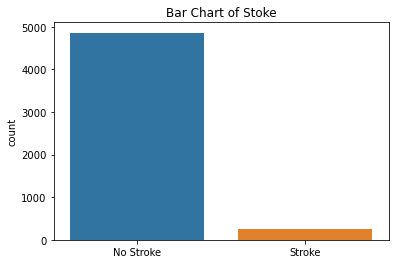

0    4861
1     249
Name: stroke, dtype: int64

In [8]:
# visualize the target variable
import seaborn as sns
g = sns.countplot(stroke_data["stroke"])
g.set_xticklabels(['No Stroke','Stroke'])
plt.title('Bar Chart of Stoke')
plt.xlabel('')
plt.show()
counts = stroke_data["stroke"].value_counts()
counts

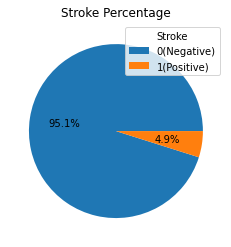

In [9]:
#fig, ax = g.subplots()
plt.pie(counts, autopct='%1.1f%%')
plt.legend(labels=['0(Negative)', '1(Positive)'], title='Stroke',loc='upper right')
plt.title("Stroke Percentage")
plt.show()

[Text(0.5, 1.0, 'Histogram of Age')]

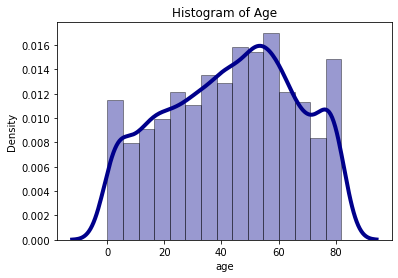

In [10]:
sns.distplot(stroke_data['age'], hist=True, kde=True, bins = 15,color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4}).set(title='Histogram of Age')# Density Plot and Histogram of all arrival delays


[Text(0.5, 1.0, 'Histogram of BMI')]

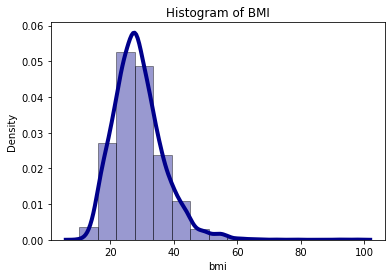

In [11]:
sns.distplot(stroke_data['bmi'], hist=True, kde=True, bins = 15,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set(title='Histogram of BMI')    

[Text(0.5, 1.0, 'Histogram of Average Glucose Level')]

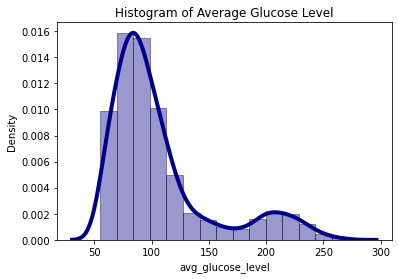

In [12]:
sns.distplot(stroke_data['avg_glucose_level'], hist=True, kde=True, bins = 15, color = 'darkblue', 
             hist_kws={"color": "darkblue", 'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set(title='Histogram of Average Glucose Level')

### Bar Charts (Categorical Variables Distribution)

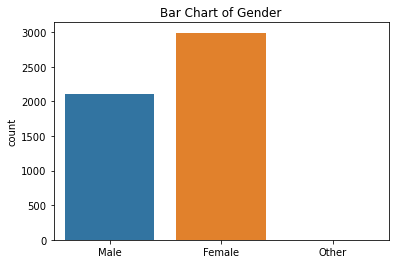

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [13]:
g = sns.countplot(stroke_data["gender"])
plt.title('Bar Chart of Gender')
plt.xlabel('')
plt.show()
counts = stroke_data["gender"].value_counts()
counts

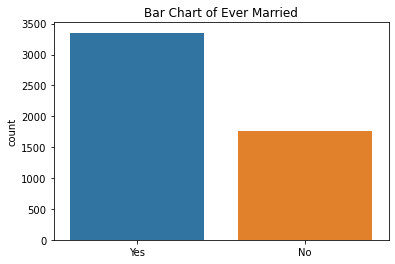

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [14]:
g = sns.countplot(stroke_data["ever_married"])
plt.title('Bar Chart of Ever Married')
plt.xlabel('')
plt.show()
counts = stroke_data["ever_married"].value_counts()
counts

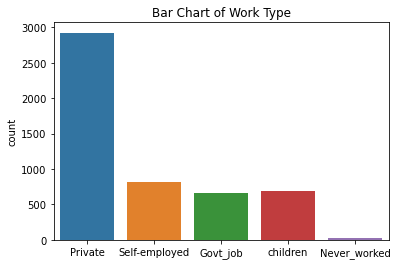

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [15]:
g = sns.countplot(stroke_data["work_type"])
plt.title('Bar Chart of Work Type')
plt.xlabel('')
plt.show()
counts = stroke_data["work_type"].value_counts()
counts

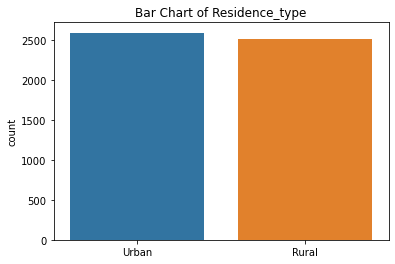

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [16]:
g = sns.countplot(stroke_data["Residence_type"])
plt.title('Bar Chart of Residence_type')
plt.xlabel('')
plt.show()
counts = stroke_data["Residence_type"].value_counts()
counts

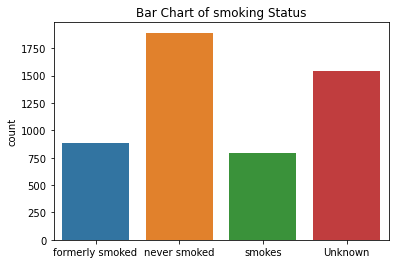

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [17]:
g = sns.countplot(stroke_data["smoking_status"])
plt.title('Bar Chart of smoking Status')
plt.xlabel('')
plt.show()
counts = stroke_data["smoking_status"].value_counts()
counts

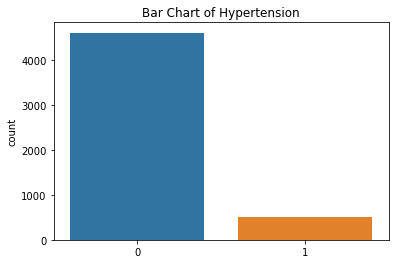

0    4612
1     498
Name: hypertension, dtype: int64

In [18]:
g = sns.countplot(stroke_data["hypertension"])
plt.title('Bar Chart of Hypertension')
plt.xlabel('')
plt.show()
counts = stroke_data["hypertension"].value_counts()
counts

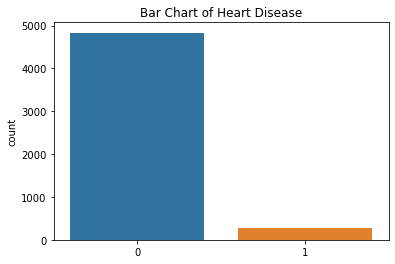

0    4834
1     276
Name: heart_disease, dtype: int64

In [19]:
g = sns.countplot(stroke_data["heart_disease"])
plt.title('Bar Chart of Heart Disease')
plt.xlabel('')
plt.show()
counts = stroke_data["heart_disease"].value_counts()
counts

## Histograms (Numerical Variables Distribution)

Text(0.5, 1.0, 'Histogram of Age')

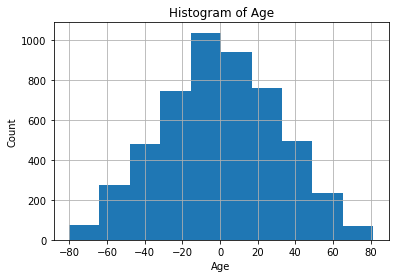

In [20]:
stroke_data['age'].diff().hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')

Text(0.5, 1.0, 'Histogram of Average Glucose Level')

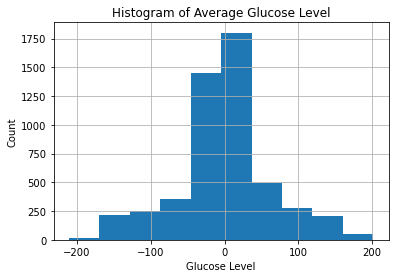

In [21]:
stroke_data['avg_glucose_level'].diff().hist()
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.title('Histogram of Average Glucose Level')

Text(0.5, 1.0, 'Histogram of BMI')

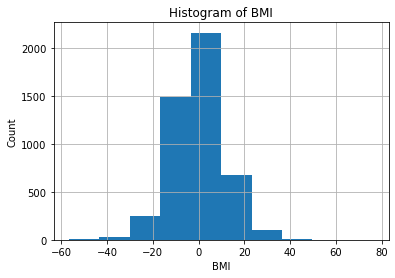

In [22]:
stroke_data['bmi'].diff().hist()
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Histogram of BMI')

### Density Plots

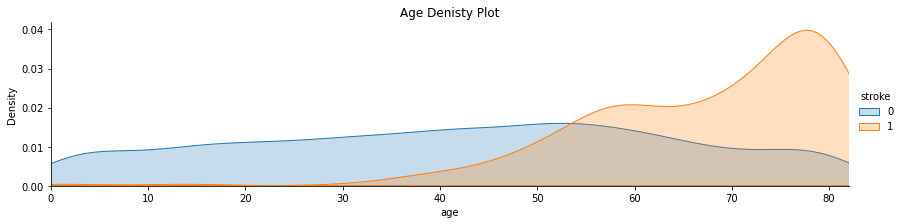

In [23]:
facet = sns.FacetGrid(stroke_data, hue='stroke',aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, stroke_data['age'].max()),title='Age Denisty Plot')
facet.add_legend()

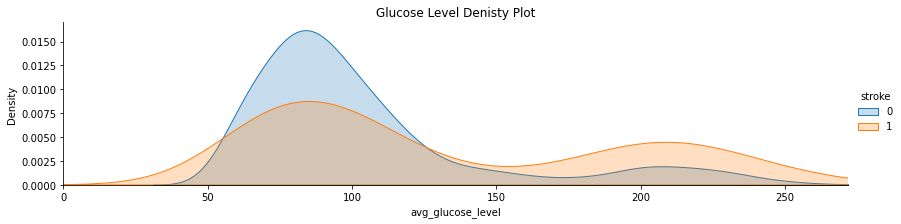

In [24]:
facet = sns.FacetGrid(stroke_data, hue='stroke',aspect=4)
facet.map(sns.kdeplot,'avg_glucose_level',shade= True)
facet.set(xlim=(0, stroke_data['avg_glucose_level'].max()),title='Glucose Level Denisty Plot')
facet.add_legend()

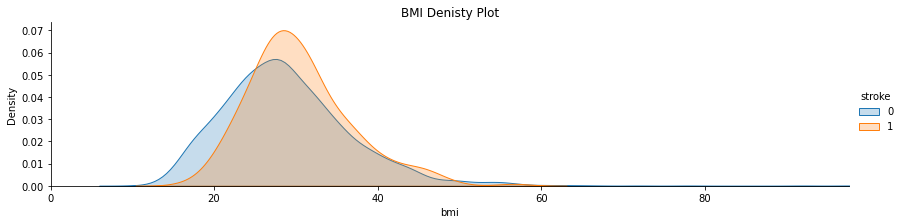

In [25]:
facet = sns.FacetGrid(stroke_data, hue='stroke',aspect=4)
facet.map(sns.kdeplot,'bmi',shade= True)
facet.set(xlim=(0, stroke_data['bmi'].max()),title='BMI Denisty Plot')
facet.add_legend()

<br>

### Correlation Matrix

In [26]:
corr_matrix = stroke_data.corr()
corr_matrix

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000,0.004,0.004,-0.001,0.001,0.003,0.006
age,0.004,1.000,0.276,0.264,0.238,0.333,0.245
hypertension,0.004,0.276,1.000,0.108,0.174,0.168,0.128
heart_disease,-0.001,0.264,0.108,1.000,0.162,0.041,0.135
avg_glucose_level,0.001,0.238,0.174,0.162,1.000,0.176,0.132
bmi,0.003,0.333,0.168,0.041,0.176,1.000,0.042
stroke,0.006,0.245,0.128,0.135,0.132,0.042,1.000


<AxesSubplot:>

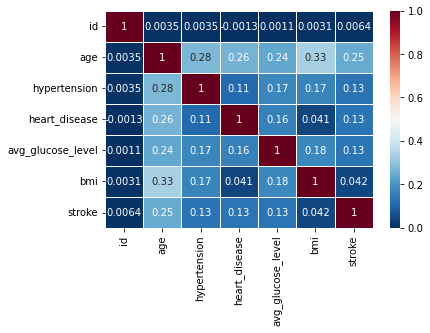

In [31]:
import seaborn as sb
sb.heatmap(corr_matrix, 
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

<br>

## Grouping and aggregating data

### Stroke vs. Gender

In [32]:
gg = pd.crosstab(stroke_data["stroke"], stroke_data["gender"])
gg

gender,Female,Male,Other
stroke,,,
0,2853,2007,1
1,141,108,0


### The bar chart shows that women are more at risk of stroke than men.

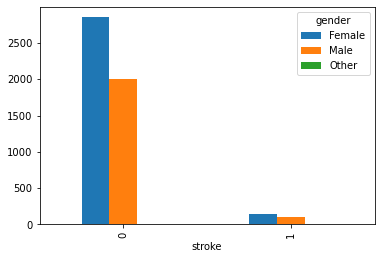

In [33]:
plt.show(gg.plot(kind="bar"))

In [34]:
gg["percent_female"] = gg["Female"]/(gg["Female"]+gg["Male"])
gg

gender,Female,Male,Other,percent_female
stroke,,,,
0,2853,2007,1,0.587
1,141,108,0,0.566


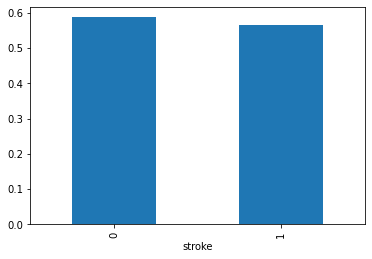

In [35]:
plt.show(gg["percent_female"].plot(kind="bar"))

In [36]:
gg["percent_male"] = gg["Male"]/(gg["Female"]+gg["Male"])
gg

gender,Female,Male,Other,percent_female,percent_male
stroke,,,,,
0,2853,2007,1,0.587,0.413
1,141,108,0,0.566,0.434


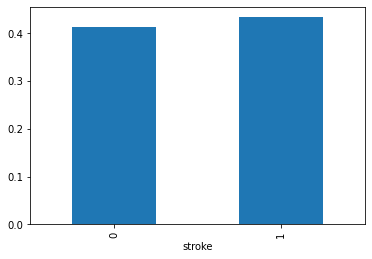

In [37]:
plt.show(gg["percent_male"].plot(kind="bar"))

<br>

<br>

### Stroke vs. Ever Married

In [38]:
MS = pd.crosstab(stroke_data["stroke"], stroke_data["ever_married"])
MS

ever_married,No,Yes
stroke,,
0,1728,3133
1,29,220


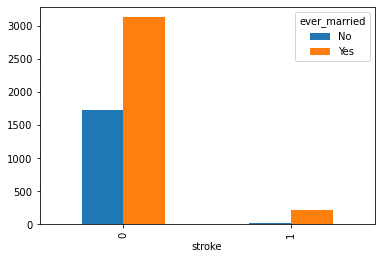

In [39]:
plt.show(MS.plot(kind="bar"))

<br>

<br>

### Stoke Vs Work Type

In [40]:
WT = pd.crosstab(stroke_data["stroke"], stroke_data["work_type"])
WT

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
0,624,22,2776,754,685
1,33,0,149,65,2


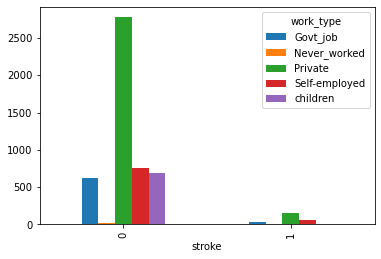

In [41]:
plt.show(WT.plot(kind="bar"))

<br>

### Stroke vs. Residence Type

In [42]:
RT = pd.crosstab(stroke_data["stroke"], stroke_data["Residence_type"])
RT

Residence_type,Rural,Urban
stroke,,
0,2400,2461
1,114,135


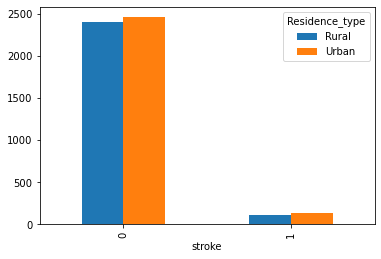

In [43]:
plt.show(RT.plot(kind="bar"))

<br>

### Stroke vs. Smoking Status

In [44]:
SM = pd.crosstab(stroke_data["stroke"], stroke_data["smoking_status"])
SM

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
0,1497,815,1802,747
1,47,70,90,42


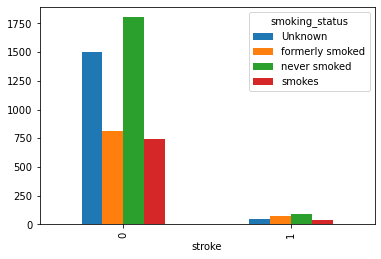

In [45]:
plt.show(SM.plot(kind="bar"))

### Stroke vs. Hypertension

In [46]:
HT = pd.crosstab(stroke_data["stroke"], stroke_data["hypertension"])
HT

hypertension,0,1
stroke,,
0,4429,432
1,183,66


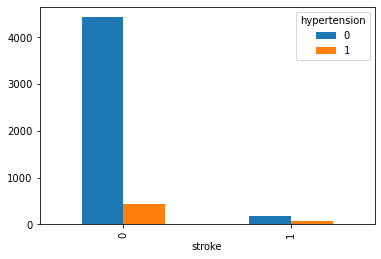

In [47]:
plt.show(HT.plot(kind="bar"))

### Stroke vs. Heart Disease

In [48]:
HD = pd.crosstab(stroke_data["stroke"], stroke_data["heart_disease"])
HD

heart_disease,0,1
stroke,,
0,4632,229
1,202,47


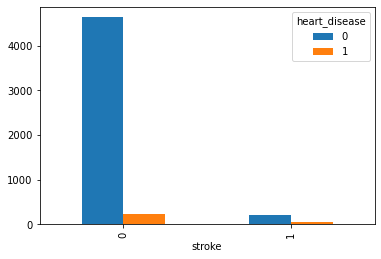

In [49]:
plt.show(HD.plot(kind="bar"))

<br>

### Drop ID Variable

In [50]:
# Remove column name 'id'
stroke_data = stroke_data.drop(['id'], axis = 1)

### Missing Values

In [51]:
stroke_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [52]:
# Percentge of missing values
stroke_data.isnull().sum().sum()/len(stroke_data)*100

3.9334637964774952

Text(0.5, 1.0, 'Missing Values')

<Figure size 720x432 with 0 Axes>

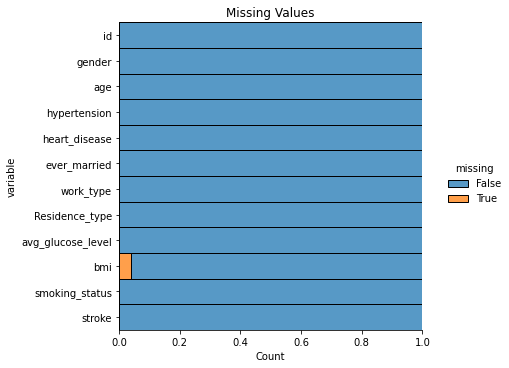

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.displot(
    data=stroke_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25,
    )
plt.title('Missing Values')


Text(0.5, 1.0, 'Missing Data')

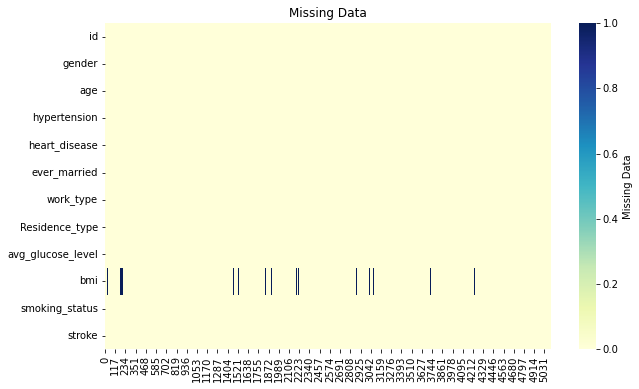

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(stroke_data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.title('Missing Data')


## Convert categorial variables to dummy variables.

In [32]:
stroke_data_matrix = pd.get_dummies(stroke_data)
stroke_data_matrix.head(10)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.000,0,1,228.690,36.600,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.000,0,0,202.210,NaN,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.000,0,1,105.920,32.500,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.000,0,0,171.230,34.400,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.000,1,0,174.120,24.000,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5,56669,81.000,0,0,186.210,29.000,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
6,53882,74.000,1,1,70.090,27.400,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
7,10434,69.000,0,0,94.390,22.800,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
8,27419,59.000,0,0,76.150,NaN,1,1,0,0,...,0,1,0,0,1,0,1,0,0,0
9,60491,78.000,0,0,58.570,24.200,1,1,0,0,...,0,1,0,0,0,1,1,0,0,0


<br>

### Impute Missing Values with MissForest

- MissForest is a machine learning-based imputation technique. 
- It uses a Random Forest algorithm to do the task. 
- It is based on an iterative approach, and at each iteration the generated predictions are better.

To summarize, MisForrest is excellent because:
- Doesn’t require extensive data preparation — as a Random forest algorithm can determine which features are important
- Doesn’t require any tuning — like K in K-Nearest Neighbors
- Doesn’t care about categorical data types — Random forest knows how to handle them

In [27]:
pip install missingpy

Note: you may need to restart the kernel to use updated packages.


In [33]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [34]:
from missingpy import MissForest

# Make an instance and perform the imputation
imputer = MissForest()
stroke_data_matrix = pd.DataFrame(imputer.fit_transform(stroke_data_matrix),columns = stroke_data_matrix.columns)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


In [35]:
stroke_data_matrix.isnull().sum()

id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [36]:
stroke_data_matrix.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.000,36517.829,21161.722,67.000,17741.250,36932.000,54682.000,72940.000
age,5110.000,43.227,22.613,0.080,25.000,45.000,61.000,82.000
hypertension,5110.000,0.097,0.297,0.000,0.000,0.000,0.000,1.000
heart_disease,5110.000,0.054,0.226,0.000,0.000,0.000,0.000,1.000
avg_glucose_level,5110.000,106.148,45.284,55.120,77.245,91.885,114.090,271.740
bmi,5110.000,28.975,7.774,10.300,23.700,28.300,33.100,97.600
stroke,5110.000,0.049,0.215,0.000,0.000,0.000,0.000,1.000
gender_Female,5110.000,0.586,0.493,0.000,0.000,1.000,1.000,1.000
gender_Male,5110.000,0.414,0.493,0.000,0.000,0.000,1.000,1.000
gender_Other,5110.000,0.000,0.014,0.000,0.000,0.000,0.000,1.000


In [37]:
stroke_data_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   float64
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   float64
 3   heart_disease                   5110 non-null   float64
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             5110 non-null   float64
 6   stroke                          5110 non-null   float64
 7   gender_Female                   5110 non-null   float64
 8   gender_Male                     5110 non-null   float64
 9   gender_Other                    5110 non-null   float64
 10  ever_married_No                 5110 non-null   float64
 11  ever_married_Yes                5110 non-null   float64
 12  work_type_Govt_job              51

<br>

## Separate target attribute and model training attributes

In [38]:
stroke_data_df = stroke_data_matrix.copy()
stroke_data_df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046.000,67.000,0.000,1.000,228.690,36.600,1.000,0.000,1.000,0.000,...,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
1,51676.000,61.000,0.000,0.000,202.210,36.794,1.000,1.000,0.000,0.000,...,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
2,31112.000,80.000,0.000,1.000,105.920,32.500,1.000,0.000,1.000,0.000,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
3,60182.000,49.000,0.000,0.000,171.230,34.400,1.000,1.000,0.000,0.000,...,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
4,1665.000,79.000,1.000,0.000,174.120,24.000,1.000,1.000,0.000,0.000,...,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.000,80.000,1.000,0.000,83.750,27.937,0.000,1.000,0.000,0.000,...,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
5106,44873.000,81.000,0.000,0.000,125.200,40.000,0.000,1.000,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
5107,19723.000,35.000,0.000,0.000,82.990,30.600,0.000,1.000,0.000,0.000,...,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
5108,37544.000,51.000,0.000,0.000,166.290,25.600,0.000,0.000,1.000,0.000,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000


In [39]:
X = stroke_data_df .drop(['stroke'], axis=1)
X

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046.000,67.000,0.000,1.000,228.690,36.600,0.000,1.000,0.000,0.000,...,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
1,51676.000,61.000,0.000,0.000,202.210,36.794,1.000,0.000,0.000,0.000,...,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
2,31112.000,80.000,0.000,1.000,105.920,32.500,0.000,1.000,0.000,0.000,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
3,60182.000,49.000,0.000,0.000,171.230,34.400,1.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
4,1665.000,79.000,1.000,0.000,174.120,24.000,1.000,0.000,0.000,0.000,...,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.000,80.000,1.000,0.000,83.750,27.937,1.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
5106,44873.000,81.000,0.000,0.000,125.200,40.000,1.000,0.000,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
5107,19723.000,35.000,0.000,0.000,82.990,30.600,1.000,0.000,0.000,0.000,...,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
5108,37544.000,51.000,0.000,0.000,166.290,25.600,0.000,1.000,0.000,0.000,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000


In [40]:
y = stroke_data_df['stroke']
y

0      1.000
1      1.000
2      1.000
3      1.000
4      1.000
        ... 
5105   0.000
5106   0.000
5107   0.000
5108   0.000
5109   0.000
Name: stroke, Length: 5110, dtype: float64

In [65]:
y.shape

(5110,)

<br>

## Class Imbalance Correction

In [41]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter

In [42]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0.0: 4861, 1.0: 249})


### Random Oversampling

In [43]:
# import library
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
  
# print the features and the labels
print('x_over:\n', X_over)
print('y_over:\n', y_over)

x_over:
             id    age  hypertension  heart_disease  avg_glucose_level    bmi  \
0     9046.000 67.000         0.000          1.000            228.690 36.600   
1    51676.000 61.000         0.000          0.000            202.210 36.794   
2    31112.000 80.000         0.000          1.000            105.920 32.500   
3    60182.000 49.000         0.000          0.000            171.230 34.400   
4     1665.000 79.000         1.000          0.000            174.120 24.000   
...        ...    ...           ...            ...                ...    ...   
9717 17013.000 78.000         1.000          0.000            113.010 24.000   
9718 15102.000 78.000         1.000          0.000             75.320 27.365   
9719  8003.000 77.000         0.000          0.000             81.320 27.685   
9720  8045.000 74.000         1.000          0.000             70.280 21.800   
9721 33454.000 63.000         0.000          0.000            106.580 23.900   

      gender_Female  gender_Ma

In [44]:
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_over))

Original dataset shape Counter({0.0: 4861, 1.0: 249})
Resample dataset shape Counter({1.0: 4861, 0.0: 4861})


In [45]:
from numpy import mean
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_over, y_over, scoring='f1', cv=cv, n_jobs=-1)
print('f1 score: %.3f' % mean(scores))

f1 score: 0.996


## Split data into train and test sets

In [46]:
RANDOM_STATE = 0

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

In [48]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

<br>

### Standardization of the data

In [49]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [50]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("X_test:",X_test.shape)
print("y_test", y_test.shape)

X_train: (6999, 22)
y_train: (6999,)
X_val: (1750, 22)
y_val: (1750,)
X_test: (973, 22)
y_test (973,)


<br>

# Compare Algorithms


In [69]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

In [70]:
X = np.array(X_train)
Y = np.array(y_train)

In [71]:
# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('SVM', SVC()))
models.append(('MLP', MLPClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('KM', KMeans()))
models.append(('LR', LogisticRegression()))

In [72]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10) 
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.987283 (0.005364)
GB: 0.846410 (0.017796)


KeyboardInterrupt: 

In [ ]:
plt.rcParams["figure.figsize"] = (15,6)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<br>

## SVM CLASSIFIER



In [534]:
from sklearn.svm import SVC

In [535]:
svc_est = SVC(kernel = "rbf")

In [536]:
svc_est.fit(X_train, y_train)

SVC()

In [537]:
pred1 = svc_est.predict(X_train)

In [538]:
a = metrics.accuracy_score(y_train, pred1)

In [539]:
pred11 = svc_est.predict(X_val)

In [540]:
b = metrics.accuracy_score(y_val, pred11)


In [541]:
b = metrics.roc_auc_score

In [542]:
print("Training Accuracy: " + str(a))
print("Testing Accuracy: " + str(b))


Training Accuracy: 0.8474067723960566
Testing Accuracy: <function roc_auc_score at 0x0000025D78BA2040>


In [543]:
print(classification_report(y_val, pred11))

              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83       874
         1.0       0.81      0.89      0.85       876

    accuracy                           0.84      1750
   macro avg       0.84      0.84      0.84      1750
weighted avg       0.84      0.84      0.84      1750



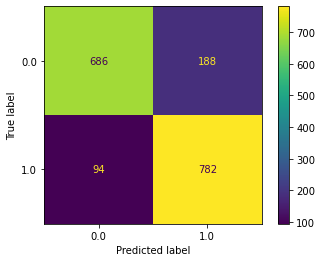

In [544]:
metrics.ConfusionMatrixDisplay.from_predictions(y_val, pred11)

In [575]:
from sklearn.model_selection import GridSearchCV
 

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, cv  = 3, n_jobs = -1)

grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

In [576]:

print(grid.best_estimator_)

SVC(C=100, gamma=1)


In [585]:
svm_test = SVC(C=100, gamma=1)
svm_test.fit(X_train, y_train)

SVC(C=100, gamma=1)

In [586]:
svm_test_1 = svm_test.predict(X_val)

In [587]:
 
# print classification report
print(classification_report(y_val, svm_test_1))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       874
         1.0       0.95      1.00      0.97       876

    accuracy                           0.97      1750
   macro avg       0.97      0.97      0.97      1750
weighted avg       0.97      0.97      0.97      1750



In [580]:
y = SVC(C=10, gamma = 1)

In [581]:
res = y.fit(X_train, y_train)

In [582]:
t = res.predict(X_test)

In [583]:
print(classification_report(y_test, t))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       474
         1.0       0.95      1.00      0.97       499

    accuracy                           0.97       973
   macro avg       0.97      0.97      0.97       973
weighted avg       0.97      0.97      0.97       973



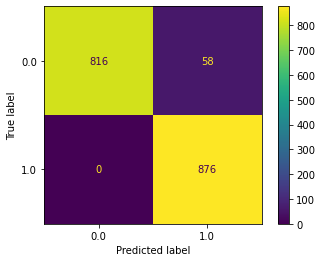

In [584]:
metrics.ConfusionMatrixDisplay.from_predictions(y_val, svm_test_1)

## PCA with SVM 


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [ ]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

15 components seems optimal


In [ ]:
X_train_pca2 = X_train_pca[:, 0:15]
X_val_pca2 = X_val_pca[:, 0:15]
X_test_pca2 = X_test_pca[:, 0:15]

In [ ]:
from sklearn.svm import SVC

In [ ]:
estimator = SVC(kernel ='rbf')

In [ ]:
estimator.fit(X_train_pca2,y_train)

In [ ]:
pred = estimator.predict(X_train_pca2)

In [ ]:
svm = metrics.accuracy_score(y_train,pred)

In [ ]:
pred2 = estimator.predict(X_val_pca2)

In [ ]:
svm1 = metrics.accuracy_score(y_val,pred2)

In [ ]:
roc = metrics.roc_auc_score(y_val, pred2)
roc


In [ ]:
print("Training Accuracy: " + str(svm))
print("Testing Accuracy: " + str(svm1))


In [ ]:
print(classification_report(y_val,pred2))

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_val, pred2)

Grid Search for SVM Classifier (PCA Transformed)



In [ ]:
param_pca = {'C': [1,10,100,1000],
              'gamma': [0.001,0.0001,1]}

In [ ]:
gs = GridSearchCV(estimator = estimator, param_grid = 
param_pca, cv = 5, n_jobs = -1)

In [ ]:
gs.fit(X_train_pca2, y_train)

In [ ]:
best_estimator = gs.best_estimator_
gs.best_params_

In [ ]:
pca_new =SVC(C = 1000, gamma = 1)

In [ ]:
pca_new.fit(X_train_pca2 ,y_train)

In [ ]:
pca_new1 = pca_new.predict(X_val_pca2)

In [ ]:
print(metrics.classification_report(y_val, pca_new1))

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_val, pca_new1)

## Adaboost GS

Run default Adaboost Classifier below this adaboost gridsearch
Code will fail


In [556]:
ada_grid = {'n_estimators': [25,50,75,100,125],
    'learning_rate':[0.001,0.01, 1]}

In [557]:
grid_search_ada = GridSearchCV(estimator = ab, param_grid = 
ada_grid, cv = 3, n_jobs = -1)

In [558]:
grid_search_ada.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 1],
                         'n_estimators': [25, 50, 75, 100, 125]})

In [569]:
best_estimator = grid_search_ada.best_estimator_
bestfit = grid_search_ada.best_params_

In [571]:
ada_new =AdaBoostClassifier(bestfit)

In [572]:
best_estimator.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=125)

In [573]:
a = best_estimator.predict(X_val)

In [574]:
print(classification_report(y_val, a))

              precision    recall  f1-score   support

         0.0       0.86      0.77      0.81       874
         1.0       0.79      0.88      0.83       876

    accuracy                           0.82      1750
   macro avg       0.83      0.82      0.82      1750
weighted avg       0.83      0.82      0.82      1750



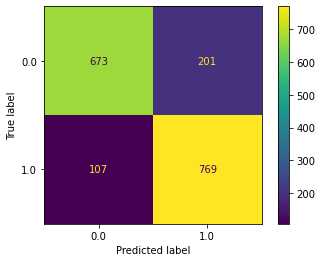

In [564]:
metrics.ConfusionMatrixDisplay.from_predictions(y_val, a)

In [565]:
ada_test = AdaBoostClassifier(learning_rate=1, n_estimators=125)

In [566]:
pred_ada = ada_test.fit(X_train, y_train)

In [567]:
res1 = pred_ada.predict(X_test)

In [568]:
print(classification_report(y_test, res1))

              precision    recall  f1-score   support

         0.0       0.87      0.77      0.82       474
         1.0       0.81      0.89      0.85       499

    accuracy                           0.83       973
   macro avg       0.84      0.83      0.83       973
weighted avg       0.84      0.83      0.83       973



## AdaBoost Classifier


In [545]:
from sklearn.ensemble import AdaBoostClassifier

In [546]:
ab = AdaBoostClassifier()

In [547]:
ab.fit(X_train, y_train)

AdaBoostClassifier()

In [548]:
ab_pred = ab.predict(X_train)

In [549]:
a1 = metrics.accuracy_score(y_train, ab_pred)


In [550]:
ab_pred_2 = ab.predict(X_val)

In [551]:
a2 = metrics.accuracy_score(y_val, ab_pred_2)

In [552]:
a3 = metrics.roc_auc_score(y_val, ab_pred_2)
a3

0.797653939792901

In [553]:
print("Training Accuracy: " + str(a1))
print("Testing Accuracy: " + str(a2))


Training Accuracy: 0.7979711387341049
Testing Accuracy: 0.7977142857142857


In [554]:
print(classification_report(y_val,ab_pred_2))

              precision    recall  f1-score   support

         0.0       0.83      0.74      0.79       874
         1.0       0.77      0.85      0.81       876

    accuracy                           0.80      1750
   macro avg       0.80      0.80      0.80      1750
weighted avg       0.80      0.80      0.80      1750



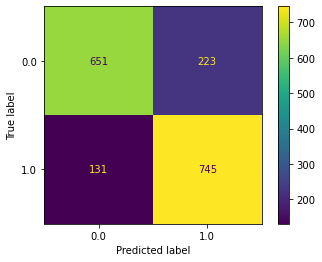

In [555]:
metrics.ConfusionMatrixDisplay.from_predictions(y_val, ab_pred_2)

## XGBoost


In [221]:
from xgboost import XGBClassifier

In [222]:
est = XGBClassifier()

In [223]:
est.fit(X_train, y_train)

[08:31:32] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [224]:
x_pred = est.predict(X_train)

In [225]:
xg_acc = metrics.accuracy_score(y_train, x_pred)

In [226]:
x_pred_test = est.predict(X_val)

In [227]:
print(classification_report(y_val, x_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       874
         1.0       0.96      1.00      0.98       876

    accuracy                           0.98      1750
   macro avg       0.98      0.98      0.98      1750
weighted avg       0.98      0.98      0.98      1750



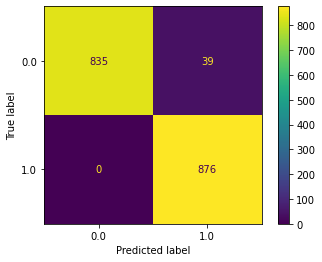

In [228]:
metrics.ConfusionMatrixDisplay.from_predictions(y_val, x_pred_test)

In [237]:
from scipy.stats import uniform, randint

In [238]:

parameters = {
    "colsample_bytree": [0.7,0.6, 0.5],
    "gamma": [0,0.1, 0.2, 0.3],
    "learning_rate": [0.003,0.002, 0.001, 0.01], # default 0.1 
    "max_depth": [2, 6],
    "n_estimators": [100, 110, 125, 150], # default 100
    "subsample": [0.2, 0.4]
}

In [239]:
grid = GridSearchCV(est, param_grid = parameters, cv = 2, n_jobs = -1)

In [240]:
grid.fit(X_train, y_train)

[08:35:53] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=10...
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                    

In [246]:
grid.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 150,
 'subsample': 0.4}

In [248]:
test= XGBClassifier(colsample_bytree= 0.6,gamma = 0,learning_rate =  0.01,max_depth= 6,n_estimators= 150,
 
                    subsample= 0.4)

In [249]:
test.fit(X_train, y_train)

[08:38:03] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.4, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [250]:
xg_g = test.predict(X_val)

In [251]:
print(metrics.classification_report(y_val, xg_g))

              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88       874
         1.0       0.85      0.96      0.90       876

    accuracy                           0.89      1750
   macro avg       0.90      0.89      0.89      1750
weighted avg       0.90      0.89      0.89      1750



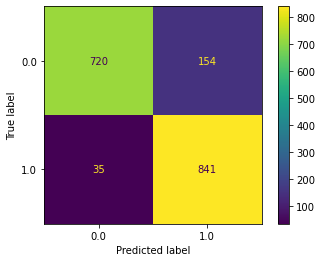

In [252]:
metrics.ConfusionMatrixDisplay.from_predictions(y_val, xg_g)

## Random Forest



In [190]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
RF = RandomForestClassifier()

In [192]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [193]:
pred = RF.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred)

1.0

In [590]:
pred2 = RF.predict(X_val)
metrics.accuracy_score(y_true = y_val, y_pred = pred2)

0.9891428571428571

In [591]:
print(classification_report(y_val, pred2))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       874
         1.0       0.98      1.00      0.99       876

    accuracy                           0.99      1750
   macro avg       0.99      0.99      0.99      1750
weighted avg       0.99      0.99      0.99      1750



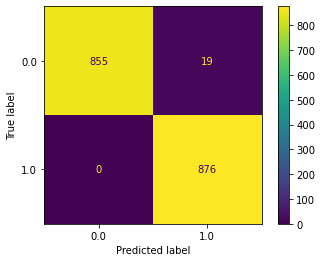

In [592]:
metrics.ConfusionMatrixDisplay.from_predictions(y_val, pred2)

In [255]:
# Issues with results
#parameters ={
## 'max_depth': [None,5,15],
 #'max_features': ['auto', 'sqrt'],
 ##'min_samples_leaf': [5,25,100],
 #'n_estimators': [100,200,500,1000]}

In [445]:
# Issues with results
parameters = dict(
    #min_samples_split =[10,20, 30,50,70,80],
    min_samples_split =[50,100,300,400,500,600],
    #n_estimators = [64,128,256,400,500],
    n_estimators = [200,250,500],
    max_depth = [1,4,100,None]
    
)

In [446]:
grid3 = GridSearchCV(RF, parameters, cv = 3, n_jobs = -1)

In [447]:
grid3.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 4, 100, None],
                         'min_samples_split': [50, 100, 300, 400, 500, 600],
                         'n_estimators': [200, 250, 500]})

In [450]:
grid3.best_estimator_

RandomForestClassifier(min_samples_split=50, n_estimators=200)

In [451]:
rf = RandomForestClassifier(min_samples_split=50, n_estimators=200)

In [452]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=50, n_estimators=200)

In [453]:
rf_pred = rf.predict(X_val)

In [454]:
print(confusion_matrix(y_val, rf_pred))

[[756 118]
 [ 24 852]]


In [455]:
print(classification_report(y_val, rf_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91       874
         1.0       0.88      0.97      0.92       876

    accuracy                           0.92      1750
   macro avg       0.92      0.92      0.92      1750
weighted avg       0.92      0.92      0.92      1750



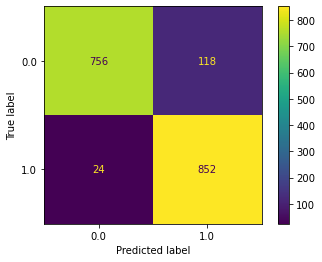

In [593]:
metrics.ConfusionMatrixDisplay.from_predictions(y_val, rf_pred)

## Decision Tree

In [206]:
from sklearn.tree import DecisionTreeClassifier

In [207]:
DT = DecisionTreeClassifier()

In [208]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [209]:
pred222 = DT.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred222)

1.0

In [210]:
pred2222 = DT.predict(X_val)
metrics.accuracy_score(y_true = y_val, y_pred = pred2222)

0.9737142857142858

In [211]:
print(classification_report(y_val, pred2222))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       874
         1.0       0.95      1.00      0.97       876

    accuracy                           0.97      1750
   macro avg       0.98      0.97      0.97      1750
weighted avg       0.98      0.97      0.97      1750



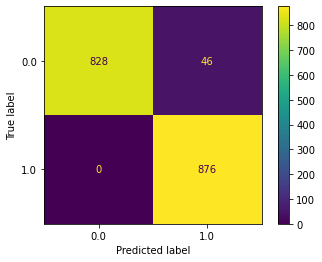

In [212]:
metrics.ConfusionMatrixDisplay.from_predictions(y_val, pred2222)

In [368]:
param_dt =  {'min_samples_split':[100,150,200,250,350,450,500,700],
            'max_depth':[50,200, None]}

In [369]:
grid4 = GridSearchCV(DT, param_dt, cv = 3, n_jobs = -1)
grid4.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [50, 200, None],
                         'min_samples_split': [100, 150, 200, 250, 350, 450,
                                               500, 700]})

In [370]:
grid4.best_estimator_

DecisionTreeClassifier(max_depth=50, min_samples_split=100)

In [371]:
df = RandomForestClassifier(max_depth = 50, min_samples_split=100)

In [372]:
fff = df.fit(X_train, y_train)

In [373]:
pred_dt = fff.predict(X_val)

In [374]:
print(classification_report(y_val, pred_dt))

              precision    recall  f1-score   support

         0.0       0.91      0.81      0.86       874
         1.0       0.83      0.92      0.87       876

    accuracy                           0.87      1750
   macro avg       0.87      0.87      0.87      1750
weighted avg       0.87      0.87      0.87      1750



In [807]:
metrics.roc_auc_score(y_val, pred_dt)

0.8656468449264912

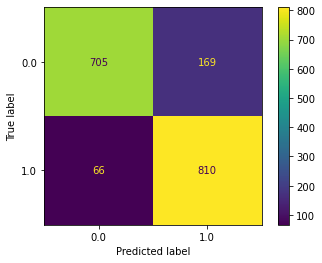

In [415]:
metrics.ConfusionMatrixDisplay.from_predictions(y_val, pred_dt)

# KNN

In [213]:
from sklearn.neighbors import KNeighborsClassifier

In [808]:
KN = KNeighborsClassifier()

In [809]:
KN.fit(X_train , y_train)

KNeighborsClassifier()

In [810]:
p = KN.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = p)

0.9468495499357051

In [217]:
p2 = KN.predict(X_val)
metrics.accuracy_score(y_true = y_train, y_pred = p)

0.9468495499357051

In [218]:
print(classification_report(y_val, p2))

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92       874
         1.0       0.87      1.00      0.93       876

    accuracy                           0.93      1750
   macro avg       0.94      0.93      0.93      1750
weighted avg       0.94      0.93      0.93      1750



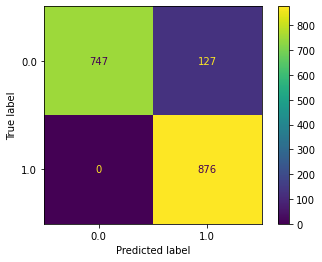

In [219]:
metrics.ConfusionMatrixDisplay.from_predictions(y_val, p2)

In [405]:
param_Knn = {
    'n_neighbors': [20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']
}

In [406]:
knn_gs = GridSearchCV(KN, param_Knn, cv = 3, n_jobs = -1)
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [20],
                         'weights': ['uniform', 'distance']})

In [407]:
knn_gs.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='distance')

In [409]:
kn11 = KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='distance')

In [410]:
prod = kn11.fit(X_train, y_train)

In [411]:
pred_Knn = prod.predict(X_val)

In [413]:
print(classification_report(y_val, pred_Knn))

              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84       874
         1.0       0.79      1.00      0.88       876

    accuracy                           0.86      1750
   macro avg       0.89      0.86      0.86      1750
weighted avg       0.89      0.86      0.86      1750



In [412]:
metrics.accuracy_score(y_val, pred_Knn)

0.8645714285714285

In [806]:
metrics.roc_auc_score(y_val, pred_Knn)


0.86441647597254

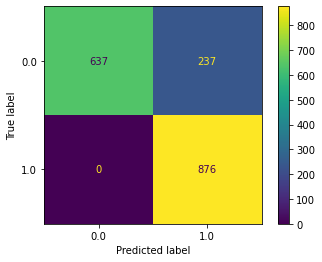

In [414]:
metrics.ConfusionMatrixDisplay.from_predictions(y_val, pred_Knn)

## Stochastic Gradient Descent

In [51]:
 from sklearn.linear_model import SGDClassifier

In [595]:
sgd = SGDClassifier()

In [596]:
sgd.fit(X_train, y_train)

SGDClassifier()

In [597]:
sgd1 = sgd.predict(X_train)

In [598]:
sgd2 = sgd.predict(X_val)

In [599]:
print(metrics.classification_report(y_val, sgd2))

              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77       874
         1.0       0.76      0.80      0.78       876

    accuracy                           0.77      1750
   macro avg       0.77      0.77      0.77      1750
weighted avg       0.77      0.77      0.77      1750



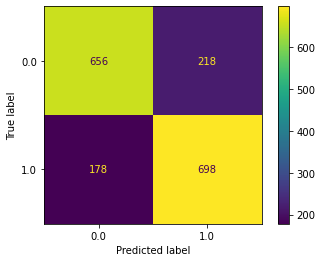

In [600]:
metrics.ConfusionMatrixDisplay.from_predictions(y_val, sgd2)

In [ ]:
param = {
   'learning_rate':['optimal'],
   'eta0':[0.1]

  
  

}

In [ ]:
grid_sgd = GridSearchCV(estimator =sgd, param_grid = param, cv = 3, n_jobs = -1)

In [ ]:
grid_sgd.fit(X_train, y_train)

In [ ]:
grid_sgd.get_params().keys()

In [ ]:
grid_sgd.best_estimator_

In [ ]:
sgd_new = SGDClassifier(eta0=0.1)

In [ ]:
sgd_new.fit(X_train, y_train)

In [ ]:
sgd11 = sgd_new.predict(X_val)

In [ ]:
print(classification_report(y_val, sgd11))

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_val, sgd11)

In [641]:
from sklearn.neural_network import MLPClassifier

In [642]:
MLP = MLPClassifier()
fit = MLP.fit(X_train, y_train)




In [643]:
pred_fit = fit.predict(X_val)

In [644]:
print(classification_report(y_val, pred_fit))

              precision    recall  f1-score   support

         0.0       0.96      0.89      0.92       874
         1.0       0.90      0.97      0.93       876

    accuracy                           0.93      1750
   macro avg       0.93      0.93      0.93      1750
weighted avg       0.93      0.93      0.93      1750



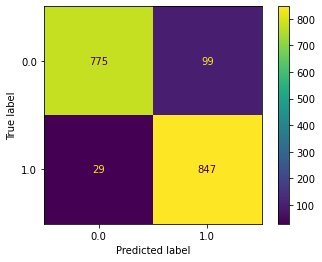

In [645]:
metrics.ConfusionMatrixDisplay.from_predictions(y_val, pred_fit)

In [646]:
from sklearn.linear_model import LogisticRegression

In [649]:
LR = LogisticRegression()
LR_fit = LR.fit(X_train, y_train)

In [ ]:
pred = LR_fit.predict(X_val)
print(classification_report(y_val, pred))

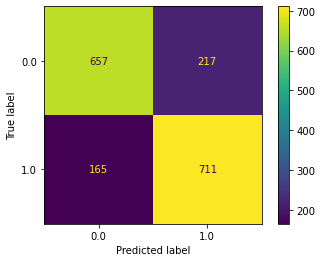

In [652]:
metrics.ConfusionMatrixDisplay.from_predictions(y_val, pred)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:


y_test_int = y_val.replace({'Good': 1, 'Bad': 0})
auc_lr = roc_auc_score(y_test_int, pred11)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_int, pred11)

auc_dt = roc_auc_score(y_test_int, pred2)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_int, pred2)

auc_rf = roc_auc_score(y_test_int, ab_pred_2)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_int, ab_pred_2)

auc_xg = roc_auc_score(y_test_int, x_pred_test)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test_int, x_pred_test)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (SVM) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (PCA) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Adaboost) = {auc_rf:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();


In [ ]:
auc_sgd = roc_auc_score(y_val, sgd11)
fpr_sgd, tpr_sgd, threholds_sgd = roc_curve(y_val, sgd11)


auc_xg = roc_auc_score(y_val, xg_g)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_val, xg_g)

auc_svm = roc_auc_score(y_val, svm_test_1)
fpr_svm, tpr_svm, threholds_svm = roc_curve(y_val, svm_test_1)

auc_ada = roc_auc_score(y_val, a)
fpr_ada, tpr_ada, threholds_ada = roc_curve(y_val, a)

auc_pca = roc_auc_score(y_val, pca_new1)
fpr_pca, tpr_pca, threholds_pca = roc_curve(y_val, pca_new1)

auc_wv = roc_auc_score(y_val, yhat)
fpr_wv, tpr_wv, threholds_wv = roc_curve(y_val, yhat)

plt.figure(figsize=(12, 7))
plt.plot(fpr_sgd, tpr_sgd, label=f'AUC (SGD) = {auc_sgd:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGB) = {auc_xg:.2f}')
plt.plot(fpr_svm, tpr_svm, label=f'AUC (SVM) = {auc_svm:.2f}')
plt.plot(fpr_ada, tpr_ada, label=f'AUC (AdaBoost) = {auc_ada:.2f}')
plt.plot(fpr_pca, tpr_pca, label=f'AUC (PCA) = {auc_pca:.2f}')
plt.plot(fpr_wv, tpr_wv, label=f'AUC (Weighted Voting) = {auc_wv:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve of Classifiers w/ GS', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

## Weighted Voting Training

In [52]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

In [67]:
modelss = []
modelss.append(('lr', LogisticRegression(solver = 'liblinear')))
modelss.append(('bayes', GaussianNB()))
modelss.append(('RF', RandomForestClassifier(min_samples_split=50, n_estimators=200)))
modelss.append(('SVM',SVC(probability = True)))
modelss.append(('MLP', MLPClassifier(alpha = .10)))
modelss.append(('AB', AdaBoostClassifier(learning_rate=1, n_estimators=125)))
modelss.append(('DT', DecisionTreeClassifier(max_depth=50, min_samples_split=100)))
modelss.append(('KNN', KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='distance')))
#models.append(('KNN', KNeighborsClassifier()))
modelss.append(("XG", XGBClassifier(colsample_bytree= 0.6,gamma = 0,learning_rate =  0.01,max_depth= 6,n_estimators= 150,
 
                    subsample= 0.4)))
modelss.append(("SGD", SGDClassifier()))


In [88]:
#def ten_models():
  #models = list()
  #models.append(('lr', LogisticRegression()))
  #models.append(('bayes', GaussianNB()))
  #models.append(('RF', RandomForestClassifier()))
  #models.append(('SVM',SVC(probability = True)))
  #models.append(('MLP', MLPClassifier()))
  #models.append(('AB', AdaBoostClassifier()))
  #models.append(('DT', DecisionTreeClassifier()))
  #models.append(('KNN', KNeighborsClassifier()))
  #models.append(("XG", XGBClassifier()))
  #models.append(("SGD", SGDClassifier()))

  
  #return models
    
modelss = []
modelss.append(('lr', LogisticRegression(solver = 'liblinear')))
modelss.append(('bayes', GaussianNB()))
modelss.append(('RF', RandomForestClassifier(min_samples_split=50, n_estimators=200)))
modelss.append(('SVM',SVC(probability = True)))
modelss.append(('MLP', MLPClassifier(alpha = .5)))
modelss.append(('AB', AdaBoostClassifier(learning_rate=1, n_estimators=125)))
modelss.append(('DT', DecisionTreeClassifier(max_depth=50, min_samples_split=100)))
modelss.append(('KNN', KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='distance')))
#models.append(('KNN', KNeighborsClassifier()))
modelss.append(("XG", XGBClassifier(colsample_bytree= 0.6,gamma = 0,learning_rate =  0.01,max_depth= 6,n_estimators= 150,
 
                    subsample= 0.4)))
modelss.append(("SGD", SGDClassifier()))


In [89]:
# evaluate each model in turn
results = []
names = []
roc = []
scoring = 'accuracy'
for name, model in modelss:
    kfold = model_selection.KFold(n_splits=10) 
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
   # y_pred = model_selection.cross_val_predict(model, X_train, y_train, cv=kfold)
   
    roc.append(metrics.roc_auc_score(y_test, y_pred))
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results.append(cv_results)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    
    print(msg)
    
    print(confusion_matrix(y_test, y_pred))
    
    

    

lr: 0.767253 (0.016404)
[[359 115]
 [ 98 401]]
bayes: 0.602229 (0.013284)
[[116 358]
 [  7 492]]
RF: 0.912702 (0.011202)
[[428  46]
 [ 13 486]]
SVM: 0.835405 (0.012640)
[[384  90]
 [ 42 457]]
MLP: 0.869983 (0.018615)
[[393  81]
 [ 19 480]]
AB: 0.808114 (0.014819)
[[362 112]
 [ 54 445]]
DT: 0.872985 (0.015608)
[[417  57]
 [ 39 460]]
KNN: 0.846122 (0.018848)
[[338 136]
 [  0 499]]
[21:34:56] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:57] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:57] WARNING: D:\bld\xgboost-split

In [90]:
print(roc)

[0.7751156321080981, 0.7804955903367917, 0.6153488411422, 0.9384507411447366, 0.8629791228025672, 0.8955188858730119, 0.8277483236515224, 0.9007952614088938, 0.8565400843881856, 0.9189349162459941]


In [1488]:

models = list()
models.append(('lr', LogisticRegression()))
models.append(('bayes', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM',SVC(probability = True)))
models.append(('MLP', MLPClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(("XG", XGBClassifier()))
models.append(("SGD", SGDClassifier()))

In [1538]:
for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, metrics.accuracy_score(y_test, predictions))

lr 0.7697841726618705
bayes 0.6495375128468653
RF 0.9917780061664954
SVM 0.8499486125385406
MLP 0.9260020554984584
AB 0.8139773895169579
DT 0.9856115107913669
KNN 0.9198355601233299
[22:32:17] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG 0.9763617677286742
SGD 0.762589928057554


In [1489]:
# def df(models, X_train, X_val, y_train, y_val):

# evaluate each model in turn
results = []
names = []
roc = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10) 
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    y_pred = model_selection.cross_val_predict(model, X_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    
    print(msg)
    
    print(confusion_matrix(y_train, y_pred))

    


lr: 0.775687 (0.016725)
[[2573  940]
 [ 630 2856]]
bayes: 0.618660 (0.015499)
[[ 873 2640]
 [  29 3457]]
RF: 0.987284 (0.005400)
[[3424   89]
 [   0 3486]]
SVM: 0.831122 (0.017655)
[[2694  819]
 [ 363 3123]]
MLP: 0.908986 (0.011928)
[[2962  551]
 [ 130 3356]]
AB: 0.787114 (0.014879)
[[2513 1000]
 [ 490 2996]]
DT: 0.968568 (0.006321)
[[3301  212]
 [   0 3486]]
KNN: 0.918704 (0.016587)
[[2944  569]
 [   0 3486]]
[21:54:31] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:54:31] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:54:3

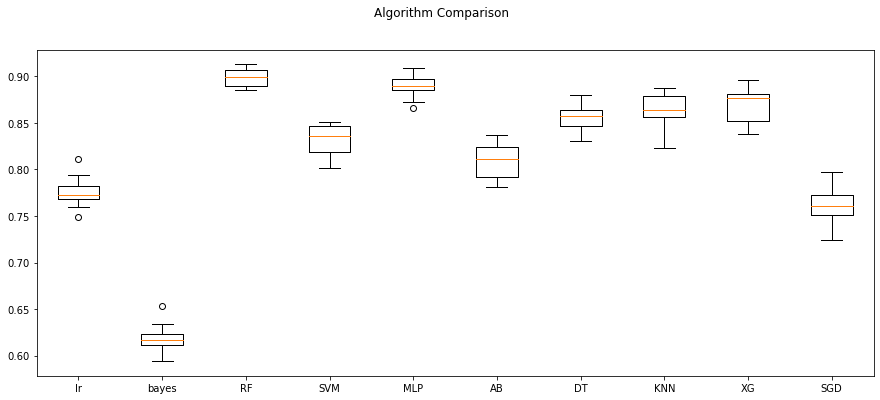

In [1142]:
plt.rcParams["figure.figsize"] = (15,6)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:

# evaluate each model in turn
results = []
names = []
roc = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10) 
    cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results.append(cv_results)
    names.append(name)
    roc.append(metrics.roc_auc_score(y_test, y_pred))
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    
    print(msg)
    
    print(confusion_matrix(y_test, y_pred))

In [1359]:
results

[array([0.76857143, 0.76857143, 0.76857143, 0.74857143, 0.78285714,
        0.76      , 0.77571429, 0.77857143, 0.79428571, 0.8111588 ]),
 array([0.61714286, 0.65285714, 0.61571429, 0.61571429, 0.62571429,
        0.59428571, 0.60285714, 0.61      , 0.63428571, 0.61802575]),
 array([0.98      , 0.99142857, 0.99428571, 0.99285714, 0.99142857,
        0.98428571, 0.99142857, 0.97428571, 0.99285714, 0.98712446])]

In [1375]:
# evaluate each model in turn
results = []
names = []
roc = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10) 
    cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results.append(cv_results)
    names.append(name)
    roc.append(metrics.roc_auc_score(y_test, y_pred))
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    
    print(msg)
    
    print(confusion_matrix(y_test, y_pred))

lr: 0.772880 (0.022123)
[[366 108]
 [116 383]]
bayes: 0.646444 (0.032888)
[[136 338]
 [  3 496]]
RF: 0.800621 (0.029475)
[[416  58]
 [ 15 484]]
SVM: 0.783137 (0.027081)
[[377  97]
 [ 49 450]]
MLP: 0.810888 (0.026057)
[[404  70]
 [ 12 487]]
AB: 0.809899 (0.028510)
[[367 107]
 [ 54 445]]
DT: 0.788302 (0.027152)
[[423  51]
 [ 38 461]]
KNN: 0.800631 (0.045465)
[[348 126]
 [  0 499]]
[12:37:23] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:23] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:24] WARNING: D:\bld\xgboost-split

In [922]:
models = ten_models()

In [923]:
#scores = df(models, X_train, X_val, y_train, y_val)
#print(scores)

In [79]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier




In [80]:
# getting mean
f = []

for i in results:
    f.append(mean(i))
    


In [81]:
f

[0.7672526057633354,
 0.6022293071735132,
 0.9145597792765174,
 0.8354054772123443,
 0.8719838544860006,
 0.8081144492131616,
 0.8742707950132843,
 0.8461218066625792,
 0.8794126302881669,
 0.7536838340486409]

In [82]:
vc = VotingClassifier(estimators=modelss, weights = f)

In [1511]:
vc = VotingClassifier(estimators=models, weights = f)

In [83]:
vc.fit(X_train, y_train)

[10:34:55] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('lr', LogisticRegression(solver='liblinear')),
                             ('bayes', GaussianNB()),
                             ('RF',
                              RandomForestClassifier(min_samples_split=50,
                                                     n_estimators=200)),
                             ('SVM', SVC(probability=True)),
                             ('MLP', MLPClassifier(alpha=0.5)),
                             ('AB',
                              AdaBoostClassifier(learning_rate=1,
                                                 n_estimators=125)),
                             ('DT',
                              DecisionTreeClassifier(max_depth=50,
                                                     min_samples_split=...
                                            predictor='auto', random_state=0,
                                            reg_alpha=0, reg_lambda=1,
                                            scale_pos_weight=1

In [73]:
pred4 = vc.predict(X_test)

In [84]:
pred5 = vc.predict(X_test)
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

         0.0       0.96      0.84      0.89       474
         1.0       0.86      0.97      0.91       499

    accuracy                           0.90       973
   macro avg       0.91      0.90      0.90       973
weighted avg       0.91      0.90      0.90       973



In [76]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

         0.0       0.96      0.84      0.89       474
         1.0       0.86      0.97      0.91       499

    accuracy                           0.90       973
   macro avg       0.91      0.90      0.90       973
weighted avg       0.91      0.90      0.90       973



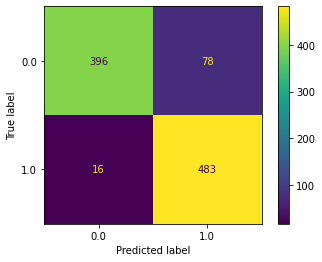

In [75]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred4)

## Testing Weighted Voting

In [63]:
pred2 = vc.predict(X_test)

score = metrics.accuracy_score(y_test, pred2)
print('Weighted Avg Accuracy: %.f' % (score*100))


Weighted Avg Accuracy: 91


In [64]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90       474
         1.0       0.87      0.98      0.92       499

    accuracy                           0.91       973
   macro avg       0.92      0.91      0.91       973
weighted avg       0.92      0.91      0.91       973



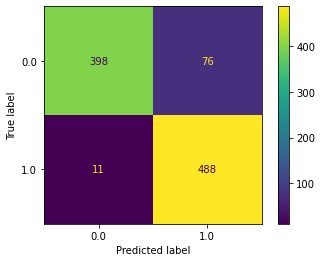

In [65]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred2)

In [66]:
print(metrics.roc_auc_score(y_test,pred2))

0.9088091795405157


In [91]:
roc = metrics.roc_auc_score(y_test, pred2)
roc

0.9088091795405157

In [1367]:

models2= list()
models2.append(('lr', LogisticRegression()))
models2.append(('bayes', GaussianNB()))
models2.append(('RF', RandomForestClassifier()))
models2.append(('SVM',SVC(probability = True)))
models2.append(('MLP', MLPClassifier()))
models2.append(('AB', AdaBoostClassifier()))
models2.append(('DT', DecisionTreeClassifier()))
models2.append(('KNN', KNeighborsClassifier()))
models2.append(("XG", XGBClassifier()))
models2.append(("SGD", SGDClassifier()))

In [1372]:
# def df(models, X_train, X_val, y_train, y_val):

# evaluate each model in turn
results = []
names = []
roc = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10) 
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append(cv_results)
    names.append(name)
    roc.append(metrics.roc_auc_score(y_test, y_pred))
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    
    print(msg)
    
    print(confusion_matrix(y_test, y_pred))
    


lr: 0.775687 (0.016725)
[[366 108]
 [116 383]]
bayes: 0.618660 (0.015499)
[[136 338]
 [  3 496]]
RF: 0.897130 (0.009985)
[[415  59]
 [ 14 485]]


KeyboardInterrupt: 

In [1260]:
print(roc)

0.8934091812316618


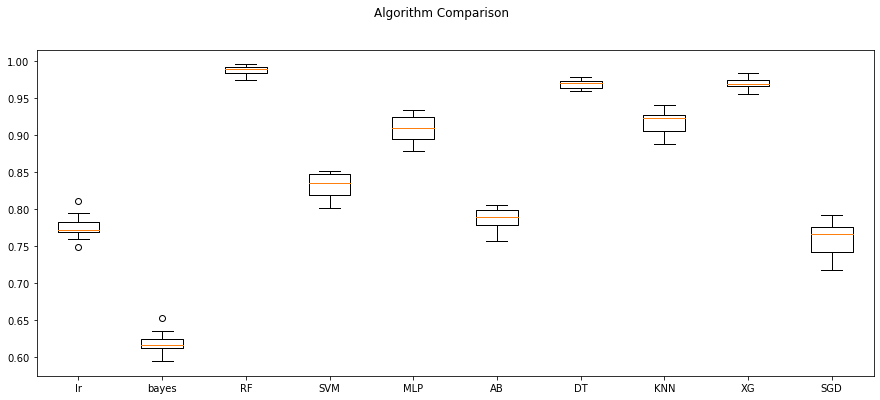

In [1103]:
plt.rcParams["figure.figsize"] = (15,6)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [1008]:
ensemble5 = VotingClassifier(estimators = models1)


In [940]:
models3 = []
models3.append(('lr', LogisticRegression(solver = 'liblinear')))
models3.append(('bayes', GaussianNB()))
models3.append(('RF', RandomForestClassifier(min_samples_split=50, n_estimators=200)))
models3.append(('SVM',SVC(probability = True)))
models3.append(('MLP', MLPClassifier(alpha = .05)))
models3.append(('AB', AdaBoostClassifier(learning_rate=1, n_estimators=125)))
models3.append(('DT', DecisionTreeClassifier(max_depth=50, min_samples_split=100)))
models3.append(('KNN', KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='distance')))
models3.append(("XG", XGBClassifier(colsample_bytree= 0.6,gamma = 0,learning_rate =  0.01,max_depth= 6,n_estimators= 150,
 
                    subsample= 0.4)))
models3.append(("SGD", SGDClassifier()))

## Gridsearch Weighted Voting

In [818]:
vc1 = VotingClassifier([
    ('1', LogisticRegression(solver = 'liblinear', random_state = 1)),
    ('2', GaussianNB()),
    ('3',SVC(probability=True)),
    ('4', RandomForestClassifier(min_samples_split=50, n_estimators=200)), 
    ('5',  MLPClassifier()),
    ('6', DecisionTreeClassifier(max_depth=50, min_samples_split=100)),
    ('7',  KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='distance')),
    ('8', XGBClassifier(colsample_bytree= 0.6,gamma = 0,learning_rate =  0.01,max_depth= 6,n_estimators= 150,
 
                    subsample= 0.4)),
    ('9', AdaBoostClassifier()),
    ('10', SGDClassifier()),
    



])

cross_val_score(vc1, X_train, y_train).mean()



[10:53:51] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:00] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:11] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:22] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

0.8574097824977024

In [985]:
w_params = {'voting': ['hard'],
            'weights':[(2,1,1,1,1,1,1,1,1,1),
                       (1,2,1,1,1,1,1,1,1,1),
                       (1,1,2,1,1,1,1,1,1,1),
                       (1,1,1,2,1,1,1,1,1,1),
                       (1,1,1,1,2,1,1,1,1,1),
                       (1,1,1,1,1,2,1,1,1,1),
                       (1,1,1,1,1,1,2,1,1,1),
                       (1,1,1,1,1,1,1,2,1,1),
                       (1,1,1,1,1,1,1,1,2,1),
                       (1,1,1,1,1,1,1,1,1,2)]}

In [986]:
grid= GridSearchCV(vc1, w_params)

In [987]:
grid.fit(X_train, y_train)

[12:43:41] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:43:52] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:44:02] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:44:15] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

GridSearchCV(estimator=VotingClassifier(estimators=[('1',
                                                     LogisticRegression(random_state=1,
                                                                        solver='liblinear')),
                                                    ('2', GaussianNB()),
                                                    ('3',
                                                     SVC(probability=True)),
                                                    ('4',
                                                     RandomForestClassifier(min_samples_split=50,
                                                                            n_estimators=200)),
                                                    ('5', MLPClassifier()),
                                                    ('6',
                                                     DecisionTreeClassifier(max_depth=50,
                                                                            

In [988]:
grid.best_params_

{'voting': 'hard', 'weights': (1, 1, 1, 2, 1, 1, 1, 1, 1, 1)}

In [990]:
b = VotingClassifier(estimators=models3, voting = 'hard', weights = [1, 1, 1, 2, 1, 1, 1, 1, 1, 1])

In [991]:
b.fit(X_train, y_train)

[13:06:57] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('lr', LogisticRegression(solver='liblinear')),
                             ('bayes', GaussianNB()),
                             ('RF',
                              RandomForestClassifier(min_samples_split=50,
                                                     n_estimators=200)),
                             ('SVM', SVC(probability=True)),
                             ('MLP', MLPClassifier(alpha=0.05)),
                             ('AB',
                              AdaBoostClassifier(learning_rate=1,
                                                 n_estimators=125)),
                             ('DT',
                              DecisionTreeClassifier(max_depth=50,
                                                     min_samples_split...
                                            learning_rate=0.01,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=

In [992]:
pred_weight = b.predict(X_val)

In [993]:
print(classification_report(y_val, pred_weight))

              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86       874
         1.0       0.82      0.94      0.88       876

    accuracy                           0.87      1750
   macro avg       0.88      0.87      0.87      1750
weighted avg       0.88      0.87      0.87      1750



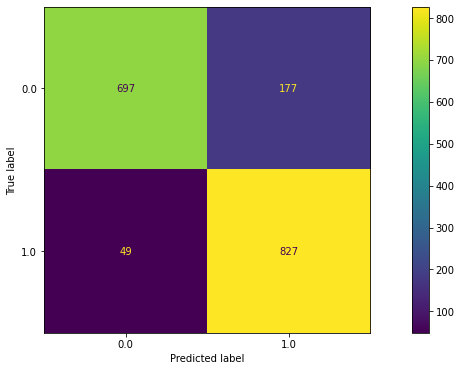

In [994]:
metrics.ConfusionMatrixDisplay.from_predictions(y_val, pred_weight)

In [495]:
pred_fit = b.predict(X_test)
print((metrics.classification_report(y_test, pred_fit)))

              precision    recall  f1-score   support

         0.0       0.97      0.83      0.89       474
         1.0       0.86      0.97      0.91       499

    accuracy                           0.90       973
   macro avg       0.91      0.90      0.90       973
weighted avg       0.91      0.90      0.90       973



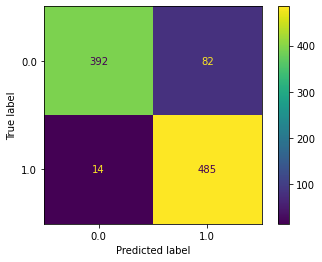

In [496]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_fit)